In [18]:
!pip install pandas matplotlib

  Using cached contourpy-1.2.1-cp39-cp39-win_amd64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/165.9 kB ? eta -:--:--
     ------- -------------------------------- 30.7/165.9 kB ? eta -:--:--
     ------- -------------------------------- 30.7/165.9 kB ? eta -:--:--
     -------------------- ---------------- 92.2/165.9 kB 871.5 kB/s eta 0:00:01
     -------------------- ---------------- 92.2/165.9 kB 871.5 kB/s eta 0:00:01
     ------------------------------------ 165.9/165.9 kB 766.9 kB/s eta 0:00:00
  Using cached kiwisolver-1.4.5-cp39-cp39-win_amd64.whl.metadata (6.5 kB)
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
  Using cached importlib_resources-6.4.0-py3-none-any.whl.metadata (3.9 kB)
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/8.0 MB 3.2 MB/s eta 0:00:03
    -------------------------------------


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


1. Transaction Analysis 
    
    a. Total number of transactions made over the year  

In [13]:
import json

# Load the JSON data
with open('P1- BankStatements.json') as f:
    data = json.load(f)

# Extract transactions
transactions = data['Account']['Transactions']['Transaction']

# Calculate the total number of transactions
total_transactions = len(transactions)
print(f'Total number of transactions: {total_transactions}')


Total number of transactions: 985


In [15]:
transactions[:10]

[{'type': 'DEBIT',
  'mode': 'CARD',
  'amount': '100.0',
  'currentBalance': '2180.80',
  'transactionTimestamp': '2023-06-27T09:40:19+05:30',
  'valueDate': '2023-06-27',
  'txnId': 'S39488701',
  'narration': 'PRCR/MS NEHA FILLING STATIO/FARRUKHAB',
  'reference': 'NA'},
 {'type': 'DEBIT',
  'mode': 'CARD',
  'amount': '170.0',
  'currentBalance': '2010.80',
  'transactionTimestamp': '2023-06-28T09:51:57+05:30',
  'valueDate': '2023-06-28',
  'txnId': 'S76862822',
  'narration': 'PRCR/MS NEHA FILLING STATIO/FARRUKHAB',
  'reference': 'NA'},
 {'type': 'DEBIT',
  'mode': 'CARD',
  'amount': '500.0',
  'currentBalance': '1510.80',
  'transactionTimestamp': '2023-07-26T10:04:00+05:30',
  'valueDate': '2023-07-26',
  'txnId': 'S31451661',
  'narration': 'PRCR/MS NEHA FILLING STATIO/FARRUKHAB',
  'reference': 'NA'},
 {'type': 'CREDIT',
  'mode': 'OTHERS',
  'amount': '15.0',
  'currentBalance': '1525.80',
  'transactionTimestamp': '2023-08-06T11:10:38+05:30',
  'valueDate': '2023-07-31',


b. Distribution of transaction amounts (small vs. large transactions)

In [14]:
# Define thresholds for small and large transactions
small_threshold = 500

# Count small and large transactions
small_transactions = [t for t in transactions if float(t['amount']) < small_threshold]
large_transactions = [t for t in transactions if float(t['amount']) >= small_threshold]

print("Small transactions:", len(small_transactions))
print("Large transactions:", len(large_transactions))


Small transactions: 687
Large transactions: 298


c. Frequency of different transaction types (debit vs. credit)

In [16]:
# Count debit and credit transactions
debit_transactions = [t for t in transactions if t['type'] == 'DEBIT']
credit_transactions = [t for t in transactions if t['type'] == 'CREDIT']

print("Debit transactions:", len(debit_transactions))
print("Credit transactions:", len(credit_transactions))


Debit transactions: 695
Credit transactions: 290


2. Balance Analysis

    a. Trend of the account balance over time

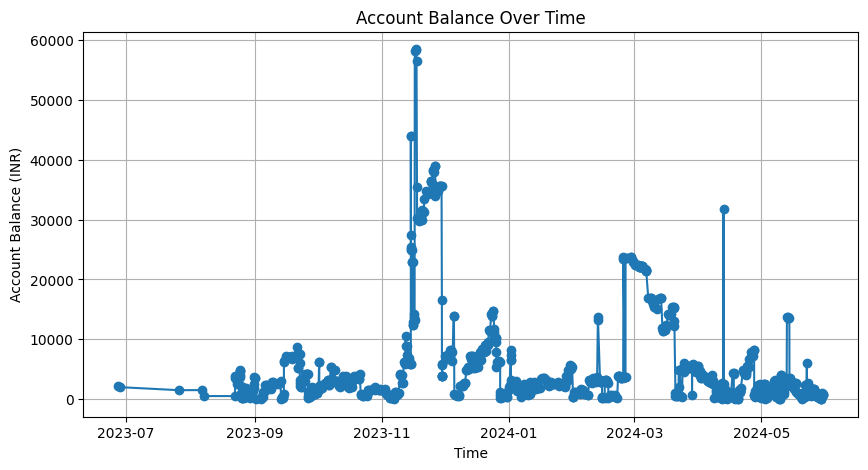

In [19]:
import matplotlib.pyplot as plt
from datetime import datetime

# Extract transaction timestamps and balances
timestamps = [datetime.fromisoformat(t['transactionTimestamp']) for t in transactions]
balances = [float(t['currentBalance']) for t in transactions]

# Plot the balance trend over time
plt.figure(figsize=(10, 5))
plt.plot(timestamps, balances, marker='o')
plt.xlabel('Time')
plt.ylabel('Account Balance (INR)')
plt.title('Account Balance Over Time')
plt.grid(True)
plt.show()


b. Periods with significant changes in the account balance

In [55]:
# Calculate balance changes
balance_changes = [balances[i] - balances[i-1] for i in range(1, len(balances))]

# Define a threshold for significant changes
significant_threshold = 1000  

# Find significant changes
significant_changes = [(timestamps[i], balance_changes[i-1]) for i in range(1, len(balance_changes)) if abs(balance_changes[i-1]) > significant_threshold]

print("Significant changes in account balance:")
for change in significant_changes:
    print(f"Time: {change[0]}, Change: {change[1]}")


Significant changes in account balance:
Time: 2023-08-22 11:49:13+05:30, Change: 3000.0
Time: 2023-08-23 08:17:48+05:30, Change: -1200.0
Time: 2023-08-25 10:24:38+05:30, Change: -2480.0
Time: 2023-08-25 10:39:35+05:30, Change: -1450.0000000000002
Time: 2023-08-27 12:19:54+05:30, Change: -1499.0
Time: 2023-08-29 11:49:00+05:30, Change: -1200.0
Time: 2023-08-31 16:09:10+05:30, Change: 1200.0
Time: 2023-09-01 10:42:42+05:30, Change: -3500.0
Time: 2023-09-05 16:38:31+05:30, Change: 1100.0000000000002
Time: 2023-09-13 10:19:32+05:30, Change: -3000.0
Time: 2023-09-14 21:14:51+05:30, Change: 5500.0
Time: 2023-09-21 06:38:19+05:30, Change: 1549.999999999999
Time: 2023-09-21 13:05:06+05:30, Change: -3499.999999999999
Time: 2023-09-21 19:28:25+05:30, Change: 2500.0
Time: 2023-09-22 10:24:00+05:30, Change: -1530.0
Time: 2023-09-22 10:44:30+05:30, Change: -2940.0
Time: 2023-09-23 08:15:20+05:30, Change: 1280.0
Time: 2023-09-25 04:18:32+05:30, Change: 1100.0
Time: 2023-09-26 10:01:36+05:30, Change:

3. Spending Patterns
    
    a. Main categories of expenses

In [50]:
# Extract all modes
modes = [txn['mode'] for txn in transactions]

# Get unique modes
unique_modes = set(modes)

print("Unique modes:", unique_modes)

Unique modes: {'UPI', 'ATM', 'OTHERS', 'CASH', 'CARD'}


In [51]:
from collections import defaultdict

# Define categories based on narration keywords
categories = {
    'card': ['card'],
    'cash_transactions': ['cash'],
    'atm_withdrawals': ['atm'],
    'upi_transactions': ['upi']
}

# Function to categorize transactions
def categorize_transaction(narration):
    for category, keywords in categories.items():
        if any(keyword in narration.lower() for keyword in keywords):
            return category
    return 'others'

# Categorize transactions
categorized_expenses = {category: 0 for category in categories}
categorized_expenses['others'] = 0

for txn in debit_transactions:
    category = categorize_transaction(txn['narration'])
    categorized_expenses[category] += float(txn['amount'])

print("Main categories of expenses and their amounts (INR):")
for category, amount in categorized_expenses.items():
    print(f"{category.capitalize()}: {amount:.2f} INR")


Main categories of expenses and their amounts (INR):
Card: 0.00 INR
Cash_transactions: 13500.00 INR
Atm_withdrawals: 0.00 INR
Upi_transactions: 407759.90 INR
Others: 830.00 INR


b. Frequency and amount of spending in each category

In [52]:
# Frequency of transactions in each category
frequency_expenses = {category: 0 for category in categories}
frequency_expenses['others'] = 0

for txn in debit_transactions:
    category = categorize_transaction(txn['narration'])
    frequency_expenses[category] += 1

print("Frequency and amount of spending in each category:")
for category, amount in categorized_expenses.items():
    frequency = frequency_expenses[category]
    print(f"{category.capitalize()}: {frequency} transactions, {amount:.2f} INR")


Frequency and amount of spending in each category:
Card: 0 transactions, 0.00 INR
Cash_transactions: 3 transactions, 13500.00 INR
Atm_withdrawals: 0 transactions, 0.00 INR
Upi_transactions: 688 transactions, 407759.90 INR
Others: 4 transactions, 830.00 INR


4. Income Analysis
    
    a. Main sources of income

In [37]:
# Define income sources
income_sources = {
    'salary': ['salary'],
    'upi_credits': ['upi'],
    'others': []
}

# Function to categorize income
def categorize_income(narration):
    for source, keywords in income_sources.items():
        if any(keyword in narration.lower() for keyword in keywords):
            return source
    return 'others'

# Categorize income
categorized_income = {source: 0 for source in income_sources}

for txn in credit_transactions:
    source = categorize_income(txn['narration'])
    categorized_income[source] += float(txn['amount'])

print("Main sources of income and their amounts (INR):")
for source, amount in categorized_income.items():
    print(f"{source.capitalize()}: {amount:.2f} INR")


Main sources of income and their amounts (INR):
Salary: 0.00 INR
Upi_credits: 179333.00 INR
Others: 241237.51 INR


b. Patterns in the timing and amount of income received

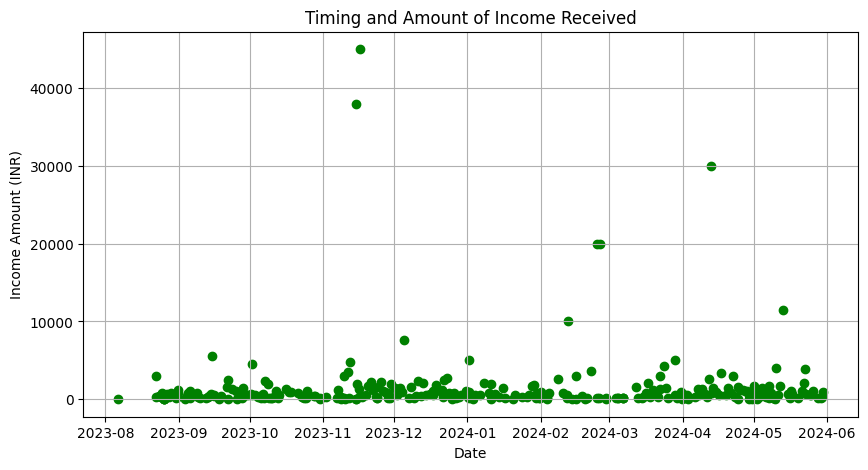

In [38]:
# Extract dates and amounts of income transactions
income_dates = [datetime.strptime(txn['transactionTimestamp'], '%Y-%m-%dT%H:%M:%S%z') for txn in credit_transactions]
income_amounts = [float(txn['amount']) for txn in credit_transactions]

# Plotting income received over time
plt.figure(figsize=(10, 5))
plt.scatter(income_dates, income_amounts, marker='o', color='green')
plt.xlabel('Date')
plt.ylabel('Income Amount (INR)')
plt.title('Timing and Amount of Income Received')
plt.grid(True)
plt.show()


5. Alert Generation
    
    a. Identify any unusual or suspicious transactions

In [54]:
# Calculate average transaction amount
average_transaction_amount = sum(float(txn['amount']) for txn in transactions) / total_transactions

# Define a threshold for unusual transactions (e.g., 3 times the average)
unusual_threshold = 3 * average_transaction_amount

unusual_transactions = [txn for txn in transactions if float(txn['amount']) >= unusual_threshold]

print("Unusual or suspicious transactions:")
for txn in unusual_transactions:
    print(f"Date: {txn['transactionTimestamp']}, Amount: {txn['amount']} INR, Narration: {txn['narration']}")


Unusual or suspicious transactions:
Date: 2023-08-22T11:49:13+05:30, Amount: 3000.0 INR, Narration: UPI/323441197152/114914/UPI/8795417446ybl/Paym
Date: 2023-09-01T10:42:42+05:30, Amount: 3500.0 INR, Narration: UPI/324450376631/104241/UPI/KAYUMTRADERSicici/
Date: 2023-09-13T10:19:32+05:30, Amount: 3000.0 INR, Narration: UPI/362228688034/101932/UPI/kayumtradersicici/
Date: 2023-09-14T21:14:51+05:30, Amount: 5500.0 INR, Narration: IMPS/P2A/325721171918/PHONEPEPRIVATEL/IMPSAXB9111
Date: 2023-09-21T13:05:06+05:30, Amount: 3500.0 INR, Narration: UPI/363099470087/130505/UPI/9910619719ybl/Paym
Date: 2023-09-22T10:44:30+05:30, Amount: 2940.0 INR, Narration: UPI/326594867550/104429/UPI/q201531625ybl/UPI
Date: 2023-09-26T10:01:36+05:30, Amount: 3000.0 INR, Narration: UPI/363526933147/100136/UPI/9326476170axl/UPI
Date: 2023-10-01T19:02:22+05:30, Amount: 4550.0 INR, Narration: IMPS/P2A/327419437183/PHONEPEPRIVATEL/IMPSAXB9111
Date: 2023-10-01T19:51:09+05:30, Amount: 4000.0 INR, Narration: UPI/3640

b. Generate alerts for low balance or high expenditure periods

In [53]:
# Define thresholds
low_balance_threshold = 500
high_expenditure_threshold = 2000

# Generate alerts
low_balance_alerts = [txn for txn in transactions if float(txn['currentBalance']) < low_balance_threshold]
high_expenditure_alerts = [txn for txn in debit_transactions if float(txn['amount']) >= high_expenditure_threshold]

print("Low balance alerts:")
for txn in low_balance_alerts:
    print(f"Date: {txn['transactionTimestamp']}, Balance: {txn['currentBalance']} INR")

print("\nHigh expenditure alerts:")
for txn in high_expenditure_alerts:
    print(f"Date: {txn['transactionTimestamp']}, Amount: {txn['amount']} INR, Narration: {txn['narration']}")


Low balance alerts:
Date: 2023-08-25T16:56:59+05:30, Balance: 175.80 INR
Date: 2023-08-25T18:23:59+05:30, Balance: 145.80 INR
Date: 2023-08-25T18:37:02+05:30, Balance: 196.80 INR
Date: 2023-08-26T15:06:16+05:30, Balance: 195.80 INR
Date: 2023-08-27T12:19:54+05:30, Balance: 315.80 INR
Date: 2023-08-29T11:49:00+05:30, Balance: 195.80 INR
Date: 2023-09-01T10:42:42+05:30, Balance: 0.80 INR
Date: 2023-09-03T18:19:09+05:30, Balance: 34.80 INR
Date: 2023-09-04T12:10:17+05:30, Balance: 494.80 INR
Date: 2023-09-04T18:21:45+05:30, Balance: 294.80 INR
Date: 2023-09-13T10:19:32+05:30, Balance: 29.80 INR
Date: 2023-09-13T19:25:01+05:30, Balance: 429.80 INR
Date: 2023-09-14T10:18:25+05:30, Balance: 289.80 INR
Date: 2023-09-14T10:24:31+05:30, Balance: 169.80 INR
Date: 2023-09-26T10:03:39+05:30, Balance: 153.80 INR
Date: 2023-09-27T12:09:21+05:30, Balance: 323.80 INR
Date: 2023-10-22T22:10:53+05:30, Balance: 491.80 INR
Date: 2023-11-04T15:57:51+05:30, Balance: 230.80 INR
Date: 2023-11-04T20:26:16+05:3